In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder


# Zadanie 1:  

## Email Spam

 Masz dane o 12 emailach z informacją czy to spam czy nie:

 **Zadania do wykonania:**

**a) Ręczne obliczenia**
1. Oblicz prawdopodobieństwa a priori: P(Spam=TAK) i P(Spam=NIE)
2. Dla każdej cechy oblicz prawdopodobieństwa warunkowe
3. Przewidź klasę dla nowego emaila:
```
   Słowo_1 = 'darmowy'
   Słowo_2 = 'wygrana'  
   Wykrzyknik = 'TAK'
```

Oblicz prawdopodobieństwa dla obu klas (TAK lub NIE) i znormalizuj

**b) Implementacja w Python**

1. Zaimplementuj obliczenia z punktu a) w Python (bez sklearn)
2. Porównaj wyniki z ręcznymi obliczeniami

**c) Sklearn**

1. Użyj `CategoricalNB` z sklearn do wytrenowania modelu
2. Porównaj wyniki z własnymi obliczeniami
3. Wyjaśnij różnice (jeśli są)

In [4]:
data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}


In [5]:
df = pd.DataFrame(data_spam)
print(df.to_string(index=True))

      Słowo_1     Słowo_2 Wykrzyknik Spam
0     darmowy     wygrana        TAK  TAK
1     darmowy     wygrana        TAK  TAK
2   spotkanie       jutro        NIE  NIE
3      raport   kwartalny        NIE  NIE
4      oferta   specjalna        TAK  NIE
5     darmowy       rabat        TAK  TAK
6   spotkanie        dziś        NIE  NIE
7      oferta  limitowana        TAK  NIE
8      raport  miesięczny        NIE  NIE
9     darmowy       rabat        TAK  TAK
10  spotkanie       pilne        NIE  NIE
11     oferta   wyjątkowa        TAK  NIE


In [6]:
features = ['Słowo_1', 'Słowo_2', 'Wykrzyknik']
conditionals = {}

In [10]:
for feature in features:
    print(f"\n{'='*60}")
    print(f"Cecha: {feature.upper()}")
    print(f"{'='*60}")
    conditionals[feature] = {}

    for class_val in ['TAK', 'NIE']:
        class_data = df[df['Spam'] == class_val]
        class_count = len(class_data)

        print(f"\nDla klasy {class_val} ({class_count} przypadków):")
        print("-" * 40)

        conditionals[feature][class_val] = {}
        feature_counts = class_data[feature].value_counts()

        for feature_val in df[feature].unique():
            count = feature_counts.get(feature_val, 0)
            prob = count / class_count
            conditionals[feature][class_val][feature_val] = prob

            print(f"{feature_val} | {class_val} = "
                  f"{count}/{class_count} = {prob:.3f}")



Cecha: SŁOWO_1

Dla klasy TAK (4 przypadków):
----------------------------------------
darmowy | TAK = 4/4 = 1.000
spotkanie | TAK = 0/4 = 0.000
raport | TAK = 0/4 = 0.000
oferta | TAK = 0/4 = 0.000

Dla klasy NIE (8 przypadków):
----------------------------------------
darmowy | NIE = 0/8 = 0.000
spotkanie | NIE = 3/8 = 0.375
raport | NIE = 2/8 = 0.250
oferta | NIE = 3/8 = 0.375

Cecha: SŁOWO_2

Dla klasy TAK (4 przypadków):
----------------------------------------
wygrana | TAK = 2/4 = 0.500
jutro | TAK = 0/4 = 0.000
kwartalny | TAK = 0/4 = 0.000
specjalna | TAK = 0/4 = 0.000
rabat | TAK = 2/4 = 0.500
dziś | TAK = 0/4 = 0.000
limitowana | TAK = 0/4 = 0.000
miesięczny | TAK = 0/4 = 0.000
pilne | TAK = 0/4 = 0.000
wyjątkowa | TAK = 0/4 = 0.000

Dla klasy NIE (8 przypadków):
----------------------------------------
wygrana | NIE = 0/8 = 0.000
jutro | NIE = 1/8 = 0.125
kwartalny | NIE = 1/8 = 0.125
specjalna | NIE = 1/8 = 0.125
rabat | NIE = 0/8 = 0.000
dziś | NIE = 1/8 = 0.125
limitowa

In [13]:
class_counts = df['Spam'].value_counts()
total = len(df)
priors = class_counts / total

new_record = {
    'Słowo_1': 'darmowy',
    'Słowo_2': 'wygrana',
    'Wykrzyknik': 'TAK'
}

# Obliczenia dla każdej klasy
scores = {}

for class_val in ['TAK', 'NIE']:
    print(f"\n{'='*60}")
    print(f"Obliczenia dla klasy: {class_val}")
    print(f"{'='*60}")

    # Zaczynamy od prior
    score = priors[class_val]
    print(f"\n1. Prior: P({class_val}) = {score:.3f}")

    # Mnożymy przez każdą cechę
    step = 2
    for feature, value in new_record.items():
        prob = conditionals[feature][class_val].get(value, 0)
        print(f"{step}. {feature}={value} | {class_val} = {prob:.3f}")
        score *= prob
        print(f"   Score po mnożeniu: {score:.6f}")
        step += 1

    print(f"\nWynik końcowy dla {class_val}: {score:.6f}")
    scores[class_val] = score


Obliczenia dla klasy: TAK

1. Prior: P(TAK) = 0.333
2. Słowo_1=darmowy | TAK = 1.000
   Score po mnożeniu: 0.333333
3. Słowo_2=wygrana | TAK = 0.500
   Score po mnożeniu: 0.166667
4. Wykrzyknik=TAK | TAK = 1.000
   Score po mnożeniu: 0.166667

Wynik końcowy dla TAK: 0.166667

Obliczenia dla klasy: NIE

1. Prior: P(NIE) = 0.667
2. Słowo_1=darmowy | NIE = 0.000
   Score po mnożeniu: 0.000000
3. Słowo_2=wygrana | NIE = 0.000
   Score po mnożeniu: 0.000000
4. Wykrzyknik=TAK | NIE = 0.375
   Score po mnożeniu: 0.000000

Wynik końcowy dla NIE: 0.000000


In [15]:
total_score = sum(scores.values())

normalized = {k: v/total_score for k, v in scores.items()}

print("Prawdopodobieństwa po normalizacji:")
for class_val in ['TAK', 'NIE']:
    percentage = normalized[class_val] * 100
    print(f"  {class_val} = {scores[class_val]:.6f} / {total_score:.6f} = "
          f"{normalized[class_val]:.3f} = {percentage:.1f}%")

print("\n" + "=" * 60)
prediction = max(normalized, key=normalized.get)
print(f"PREDYKCJA: {prediction}")
print(f"Pewność: {normalized[prediction]*100:.1f}%")
print("=" * 60)

Prawdopodobieństwa po normalizacji:
  TAK = 0.166667 / 0.166667 = 1.000 = 100.0%
  NIE = 0.000000 / 0.166667 = 0.000 = 0.0%

PREDYKCJA: TAK
Pewność: 100.0%


In [17]:
df_encoded = df.copy()

label_encoders = {}
for feature in features + ['Spam']:
    le = LabelEncoder()
    df_encoded[feature] = le.fit_transform(df_encoded[feature])
    label_encoders[feature] = le

X = df_encoded[features]
y = df_encoded['Spam']

cnb = CategoricalNB()
cnb.fit(X, y)

new_record_encoded = {}
for feature, value in new_record.items():
    new_record_encoded[feature] = label_encoders[feature].transform([value])[0]

new_record_df = pd.DataFrame([new_record_encoded])

print("Nowy rekord po zakodowaniu:")
print(new_record_df)

prediction_encoded = cnb.predict(new_record_df)
prediction_proba = cnb.predict_proba(new_record_df)

predicted_class = label_encoders['Spam'].inverse_transform(prediction_encoded)[0]

print(f"\nPredykcja sklearn dla nowego emaila: {predicted_class}")

class_labels = label_encoders['Spam'].inverse_transform(cnb.classes_)
proba_df = pd.DataFrame(prediction_proba, columns=class_labels)
print("Prawdopodobieństwa predykcji:")
print(proba_df.to_string(index=False))

Nowy rekord po zakodowaniu:
   Słowo_1  Słowo_2  Wykrzyknik
0        0        8           1

Predykcja sklearn dla nowego emaila: TAK
Prawdopodobieństwa predykcji:
     NIE      TAK
0.032119 0.967881


Sklearn stosuje wygładzanie Laplace'a, dodającą małą wartość, dzięki której prawdopodobieństwo nigdy nie będzie równe 0

# Zadanie 2

## Diagnoza grypy

Lekarz diagnozuje grypę na podstawie objawów u 15 pacjentów:

a) Analiza danych

1. Ile przypadków grypy jest w danych?
2. Która cecha najbardziej "wskazuje" na grypę? (porównaj P(cecha|TAK) vs P(cecha|NIE))
3. Stwórz wizualizację rozkładów cech dla każdej klasy

b) Predykcja dla 3 pacjentów
Dla każdego pacjenta oblicz prawdopodobieństwo grypy:
* Pacjent A: Gorączka=wysoka, Kaszel=TAK, Zmęczenie=duże
* Pacjent B: Gorączka=niska, Kaszel=NIE, Zmęczenie=małe
* Pacjent C: Gorączka=umiarkowana, Kaszel=TAK, Zmęczenie=umiarkowane

In [18]:
data = {
    'Gorączka': ['wysoka', 'wysoka', 'niska', 'wysoka', 'niska',
                 'wysoka', 'niska', 'wysoka', 'umiarkowana', 'wysoka',
                 'niska', 'umiarkowana', 'wysoka', 'niska', 'umiarkowana'],
    'Kaszel': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
               'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
               'NIE', 'TAK', 'TAK', 'NIE', 'TAK'],
    'Zmęczenie': ['duże', 'duże', 'małe', 'duże', 'małe',
                  'duże', 'małe', 'umiarkowane', 'duże', 'małe',
                  'małe', 'umiarkowane', 'duże', 'małe', 'duże'],
    'Grypa': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
              'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
              'NIE', 'NIE', 'TAK', 'NIE', 'TAK']
}

df_grypa = pd.DataFrame(data)

In [19]:
features_grypa = ['Gorączka', 'Kaszel', 'Zmęczenie']
conditionals_grypa = {}

In [23]:
for feature in features_grypa:
    print(f"\nCecha: {feature.upper()}")
    conditionals_grypa[feature] = {}

    for class_val in ['TAK', 'NIE']:
        class_data = df_grypa[df_grypa['Grypa'] == class_val]
        class_count = len(class_data)

        print(f"\n{class_val} ({class_count} przypadków):")

        conditionals_grypa[feature][class_val] = {}
        feature_counts = class_data[feature].value_counts()

        for feature_val in df_grypa[feature].unique():
            count = feature_counts.get(feature_val, 0)
            prob = count / class_count
            conditionals_grypa[feature][class_val][feature_val] = prob

            print(f"{feature_val} = "
                  f"{count}/{class_count} = {prob:.3f}")


Cecha: GORĄCZKA

TAK (8 przypadków):
wysoka = 6/8 = 0.750
niska = 0/8 = 0.000
umiarkowana = 2/8 = 0.250

NIE (7 przypadków):
wysoka = 1/7 = 0.143
niska = 5/7 = 0.714
umiarkowana = 1/7 = 0.143

Cecha: KASZEL

TAK (8 przypadków):
TAK = 8/8 = 1.000
NIE = 0/8 = 0.000

NIE (7 przypadków):
TAK = 1/7 = 0.143
NIE = 6/7 = 0.857

Cecha: ZMĘCZENIE

TAK (8 przypadków):
duże = 7/8 = 0.875
małe = 0/8 = 0.000
umiarkowane = 1/8 = 0.125

NIE (7 przypadków):
duże = 0/7 = 0.000
małe = 6/7 = 0.857
umiarkowane = 1/7 = 0.143


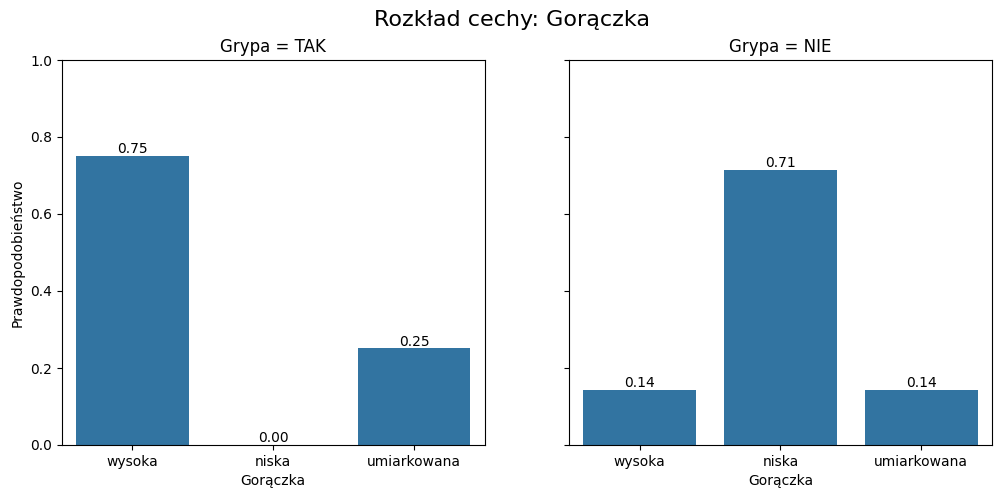

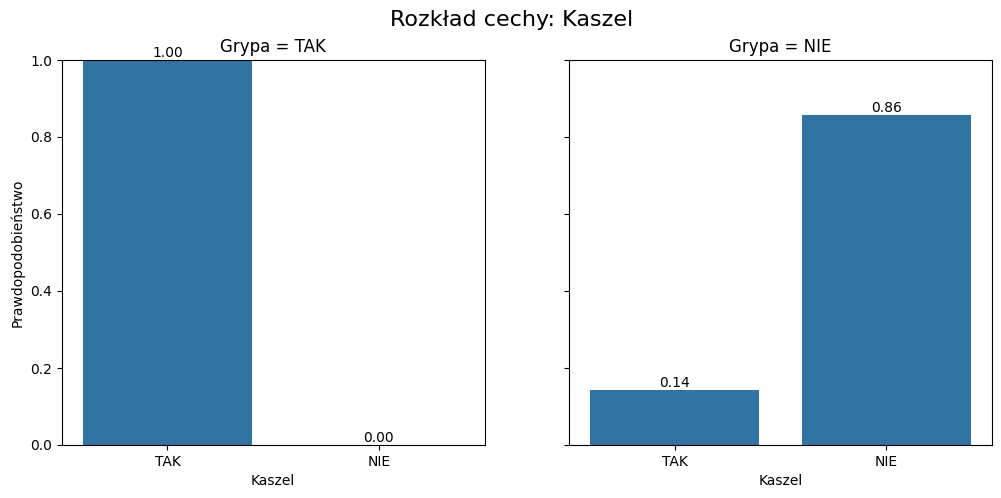

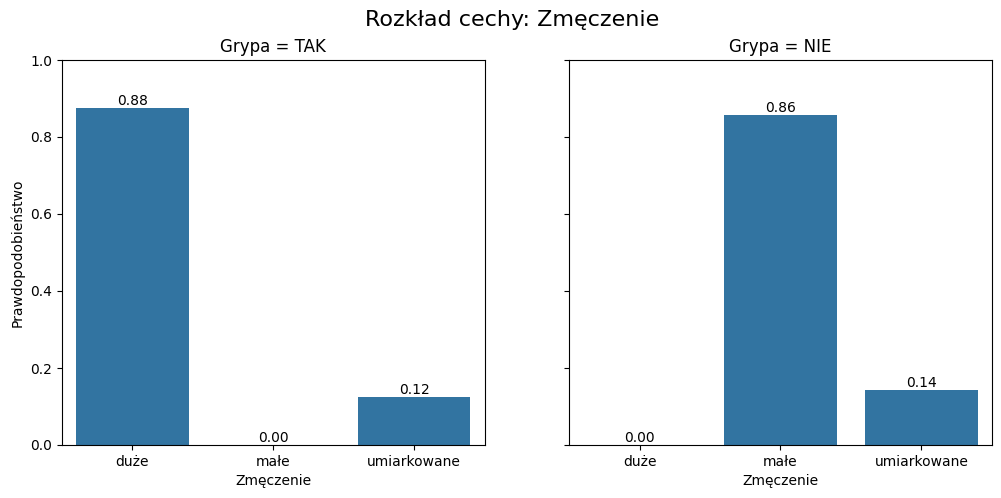

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in features_grypa:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    fig.suptitle(f'Rozkład cechy: {feature}', fontsize=16)

    class_labels = ['TAK', 'NIE']
    for i, class_val in enumerate(class_labels):
        ax = axes[i]
        probs = conditionals_grypa[feature][class_val]
        feature_vals = list(probs.keys())
        probabilities = list(probs.values())

        sns.barplot(x=feature_vals, y=probabilities, ax=ax)
        ax.set_title(f'Grypa = {class_val}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Prawdopodobieństwo' if i == 0 else '')
        ax.set_ylim(0, 1)
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.show()